In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

# theta

## data wrangling

In [2]:
theta_data = pd.read_csv('theta-usd-max.csv', index_col = 'snapped_at')
theta_data.index = pd.to_datetime(theta_data.index)
theta_data1 = theta_data.loc['2018-07-03 00:00:00 UTC':'2022-06-20 00:00:00 UTC'].copy()
theta_data1['return'] = np.log(theta_data1['price']/theta_data1['price'].shift(1))
theta_data1['volatility'] = theta_data1['return']**2
theta_data1

,price,market_cap,total_volume,return,volatility
snapped_at,,,,,
2018-07-03 00:00:00+00:00,0.163314,1.084247e+08,1.411856e+07,NaN,NaN
2018-07-04 00:00:00+00:00,0.163810,1.087541e+08,1.589027e+07,0.003033,0.000009
2018-07-05 00:00:00+00:00,0.161374,1.071364e+08,1.135845e+07,-0.014987,0.000225
2018-07-06 00:00:00+00:00,0.154385,1.024965e+08,1.186984e+07,-0.044274,0.001960
2018-07-07 00:00:00+00:00,0.157056,1.042701e+08,9.547517e+06,0.017156,0.000294
...,...,...,...,...,...
2022-06-16 00:00:00+00:00,1.340111,1.347257e+09,1.207662e+08,0.151146,0.022845
2022-06-17 00:00:00+00:00,1.182240,1.182887e+09,1.220302e+08,-0.125341,0.015710
2022-06-18 00:00:00+00:00,1.210705,1.214253e+09,8.594406e+07,0.023792,0.000566


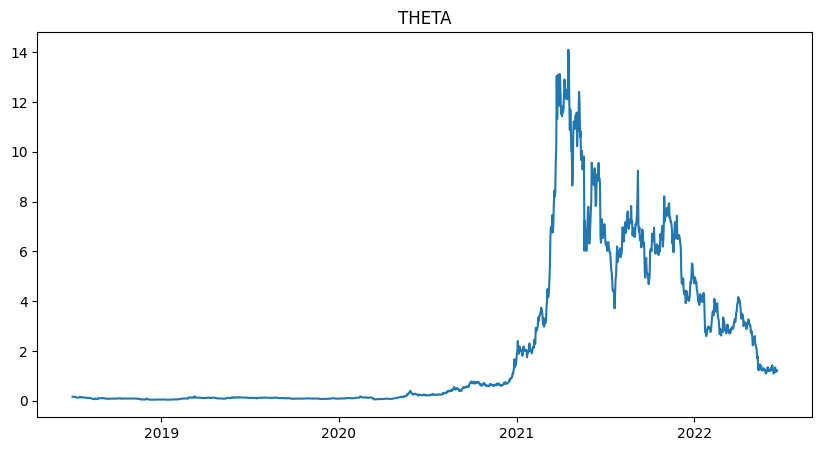

In [3]:
plt.figure(figsize=(10,5))
plt.plot(theta_data1['price'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('THETA')
plt.show()

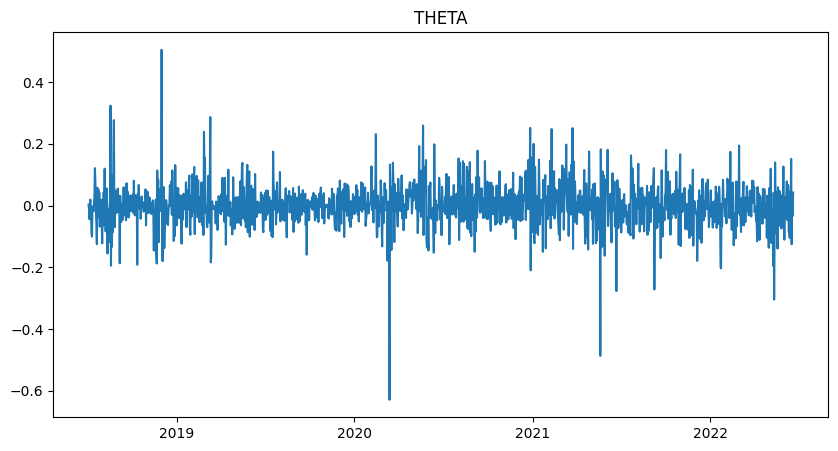

In [4]:
plt.figure(figsize=(10,5))
plt.plot(theta_data1['return'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('THETA')
plt.show()

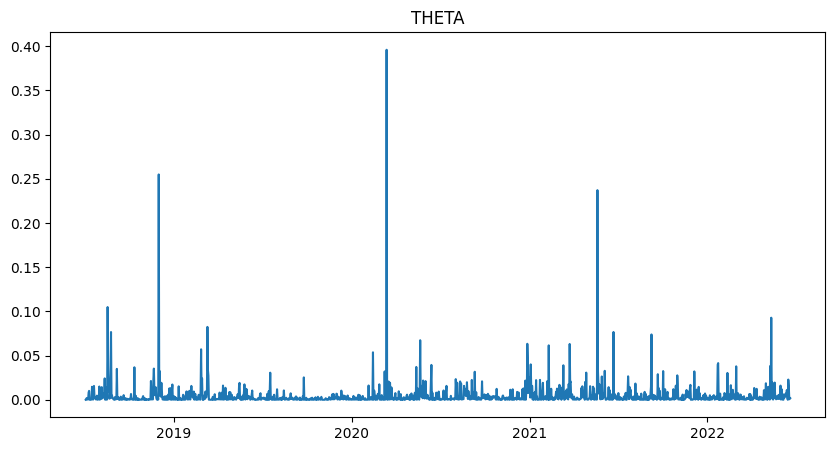

In [5]:
plt.figure(figsize=(10,5))
plt.plot(theta_data1['volatility'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('THETA')
plt.show()

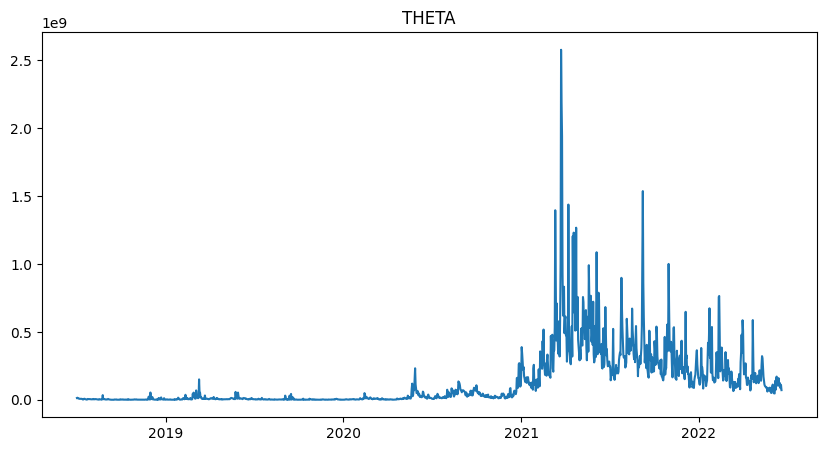

In [6]:
plt.figure(figsize=(10,5))
plt.plot(theta_data1['total_volume'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('THETA')
plt.show()

## detrended volume

In [7]:
theta_data1['log_volume'] = np.log(theta_data1['total_volume'])

In [8]:
T = len(theta_data1['log_volume'])
t = np.arange(1, T+1)

X = sm.add_constant(np.column_stack((t/T, (t/T)**2)))
model = sm.OLS(theta_data1['log_volume'], X).fit()

detrended_volume = model.resid

model.summary(), detrended_volume

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:             log_volume   R-squared:                       0.693
 Model:                            OLS   Adj. R-squared:                  0.692
 Method:                 Least Squares   F-statistic:                     1630.
 Date:                Sat, 24 Feb 2024   Prob (F-statistic):               0.00
 Time:                        20:02:24   Log-Likelihood:                -2231.6
 No. Observations:                1449   AIC:                             4469.
 Df Residuals:                    1446   BIC:                             4485.
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

In [9]:
theta_data1['detrended_volume'] = detrended_volume
theta_data1

,price,market_cap,total_volume,return,volatility,log_volume,detrended_volume
snapped_at,,,,,,,
2018-07-03 00:00:00+00:00,0.163314,1.084247e+08,1.411856e+07,NaN,NaN,16.463001,2.121931
2018-07-04 00:00:00+00:00,0.163810,1.087541e+08,1.589027e+07,0.003033,0.000009,16.581217,2.236859
2018-07-05 00:00:00+00:00,0.161374,1.071364e+08,1.135845e+07,-0.014987,0.000225,16.245472,1.897825
2018-07-06 00:00:00+00:00,0.154385,1.024965e+08,1.186984e+07,-0.044274,0.001960,16.289511,1.938574
2018-07-07 00:00:00+00:00,0.157056,1.042701e+08,9.547517e+06,0.017156,0.000294,16.071792,1.717563
...,...,...,...,...,...,...,...
2022-06-16 00:00:00+00:00,1.340111,1.347257e+09,1.207662e+08,0.151146,0.022845,18.609367,-1.572864
2022-06-17 00:00:00+00:00,1.182240,1.182887e+09,1.220302e+08,-0.125341,0.015710,18.619779,-1.567255
2022-06-18 00:00:00+00:00,1.210705,1.214253e+09,8.594406e+07,0.023792,0.000566,18.269207,-1.922631


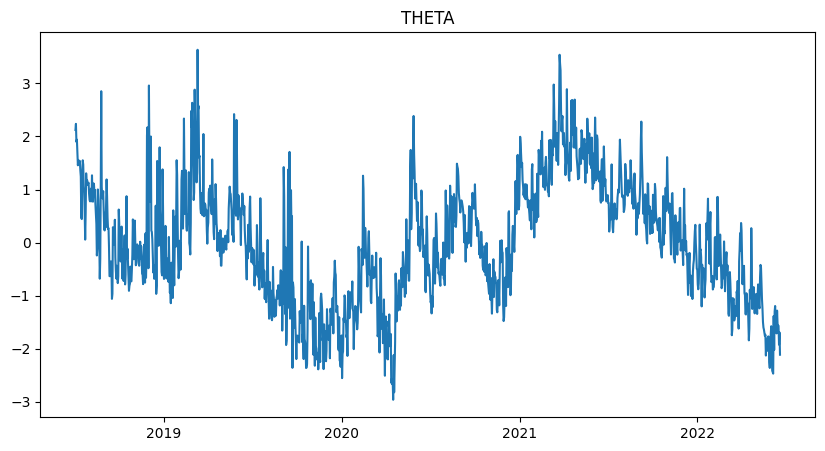

In [10]:
plt.figure(figsize=(10,5))
plt.plot(detrended_volume)

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('THETA')
plt.show()

## Q-stat (15)

In [33]:
df = theta_data1[["return", "detrended_volume", 'volatility']].dropna()
df

,return,detrended_volume,volatility
snapped_at,,,
2018-07-04 00:00:00+00:00,0.003033,2.236859,0.000009
2018-07-05 00:00:00+00:00,-0.014987,1.897825,0.000225
2018-07-06 00:00:00+00:00,-0.044274,1.938574,0.001960
2018-07-07 00:00:00+00:00,0.017156,1.717563,0.000294
2018-07-08 00:00:00+00:00,0.019465,1.456642,0.000379
...,...,...,...
2022-06-16 00:00:00+00:00,0.151146,-1.572864,0.022845
2022-06-17 00:00:00+00:00,-0.125341,-1.567255,0.015710
2022-06-18 00:00:00+00:00,0.023792,-1.922631,0.000566


In [12]:
from statsmodels.stats.stattools import jarque_bera
descriptive_stats = df.describe().T[['mean', 'max', 'min', 'std']]
descriptive_stats['skew'] = df.skew()
descriptive_stats['kurt'] = df.kurtosis()
descriptive_stats['jarque_bera'] = [jarque_bera(df[col])[0] for col in df]
descriptive_stats

,mean,max,min,std,skew,kurt,jarque_bera
return,0.001389,0.504960,-0.629336,0.070892,-0.325625,8.707760,4.564472e+03
detrended_volume,-0.001465,3.632587,-2.961297,1.128223,0.090537,-0.388669,1.122007e+01
volatility,0.005024,0.396064,0.000000,0.016395,14.627425,290.449833,5.106115e+06


In [35]:
sm.stats.acorr_ljungbox(df['return'], lags=[15], return_df=True)

,lb_stat,lb_pvalue
15,32.559106,0.005399


In [37]:
sm.stats.acorr_ljungbox(df['detrended_volume'], lags=[15], return_df=True)

,lb_stat,lb_pvalue
15,12244.467275,0.0


In [38]:
sm.stats.acorr_ljungbox(df['volatility'], lags=[15], return_df=True)

,lb_stat,lb_pvalue
15,28.58768,0.018167


# xtz

In [13]:
xtz_data = pd.read_csv('xtz-usd-max.csv', index_col = 'snapped_at')
xtz_data.index = pd.to_datetime(xtz_data.index)
xtz_data1 = xtz_data.loc['2018-07-03 00:00:00 UTC':'2022-06-20 00:00:00 UTC'].copy()
xtz_data1['return'] = np.log(xtz_data1['price']/xtz_data1['price'].shift(1))
xtz_data1['volatility'] = xtz_data1['return']**2
xtz_data1

,price,market_cap,total_volume,return,volatility
snapped_at,,,,,
2018-07-03 00:00:00+00:00,2.937866,0.000000e+00,3.172538e+06,NaN,NaN
2018-07-04 00:00:00+00:00,2.047985,0.000000e+00,1.426545e+07,-0.360827,0.130196
2018-07-05 00:00:00+00:00,1.969392,1.196384e+09,6.492796e+06,-0.039132,0.001531
2018-07-06 00:00:00+00:00,1.528033,9.282631e+08,8.681129e+06,-0.253744,0.064386
2018-07-07 00:00:00+00:00,1.796304,1.091235e+09,1.617507e+07,0.161750,0.026163
...,...,...,...,...,...
2022-06-16 00:00:00+00:00,1.522075,1.357033e+09,1.098920e+08,0.044241,0.001957
2022-06-17 00:00:00+00:00,1.359598,1.208137e+09,1.365362e+08,-0.112885,0.012743
2022-06-18 00:00:00+00:00,1.389117,1.237141e+09,6.590962e+07,0.021479,0.000461


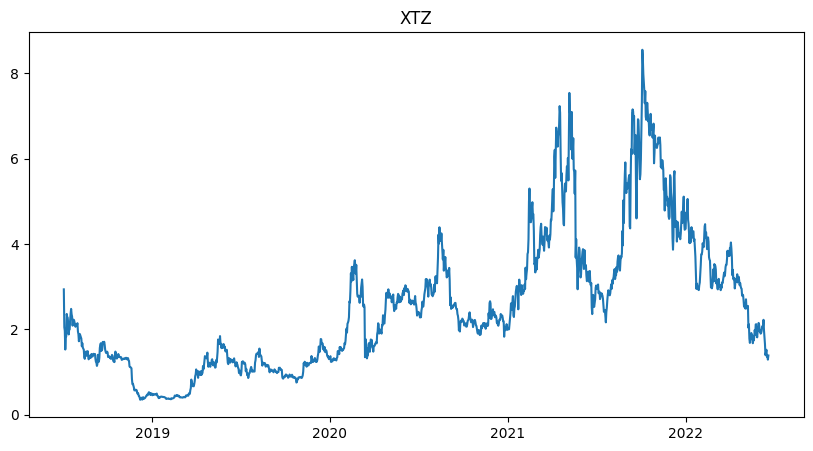

In [14]:
plt.figure(figsize=(10,5))
plt.plot(xtz_data1['price'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.title('XTZ')
plt.show()

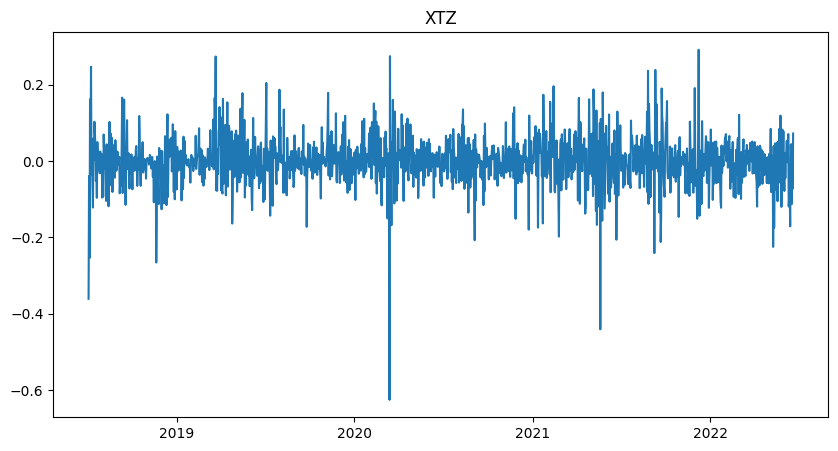

In [15]:
plt.figure(figsize=(10,5))
plt.plot(xtz_data1['return'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.title('XTZ')
plt.show()

# enj

In [16]:
enj_data = pd.read_csv('enj-usd-max.csv', index_col = 'snapped_at')
enj_data.index = pd.to_datetime(enj_data.index)
enj_data1 = enj_data.loc['2018-07-03 00:00:00 UTC':'2022-06-20 00:00:00 UTC'].copy()
enj_data1['return'] = np.log(enj_data1['price']/enj_data1['price'].shift(1))
enj_data1['volatility'] = enj_data1['return']**2
enj_data1

,price,market_cap,total_volume,return,volatility
snapped_at,,,,,
2018-07-03 00:00:00+00:00,0.063055,4.768181e+07,1.853612e+06,NaN,NaN
2018-07-04 00:00:00+00:00,0.060172,4.550128e+07,1.964800e+06,-0.046810,0.002191
2018-07-05 00:00:00+00:00,0.063566,4.806837e+07,1.856020e+06,0.054884,0.003012
2018-07-06 00:00:00+00:00,0.062161,4.700574e+07,1.761013e+06,-0.022355,0.000500
2018-07-07 00:00:00+00:00,0.060889,4.604359e+07,1.704383e+06,-0.020681,0.000428
...,...,...,...,...,...
2022-06-16 00:00:00+00:00,0.482491,4.505599e+08,1.065685e+08,0.056496,0.003192
2022-06-17 00:00:00+00:00,0.427129,3.988351e+08,7.169946e+07,-0.121876,0.014854
2022-06-18 00:00:00+00:00,0.441768,4.127615e+08,5.377738e+07,0.033698,0.001136


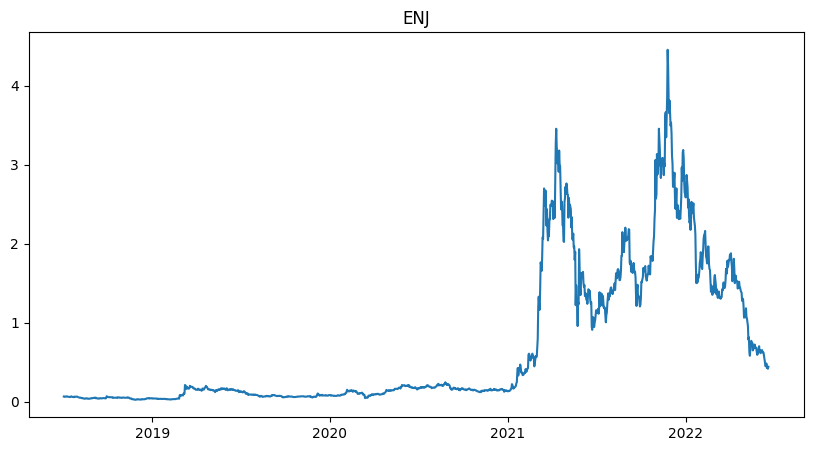

In [17]:
plt.figure(figsize=(10,5))
plt.plot(enj_data1['price'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.title('ENJ')
plt.show()

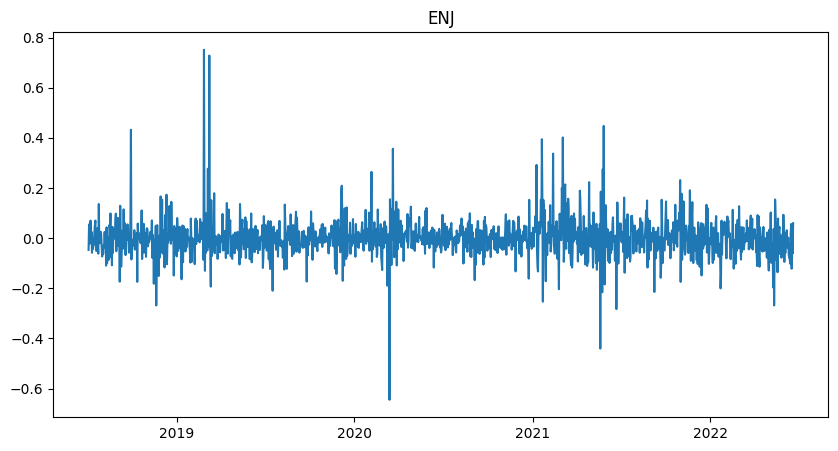

In [18]:
plt.figure(figsize=(10,5))
plt.plot(enj_data1['return'])

# Set the x-axis major formatter to only show the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# Optional: Set a locator to define the location of the ticks. Here we use YearLocator to put ticks on each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.title('ENJ')
plt.show()